### Import modules

In [3]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil
import matplotlib
import matplotlib.pyplot as plt

# Apply better style
sns.set_theme(style="whitegrid")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
#sns.set(font='Adobe Devanagari')
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 0.5, "grid.linewidth": 0.3})


matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# Not italized latex
matplotlib.rcParams['mathtext.default'] = 'regular'
matplotlib.rcParams["font.weight"] = "light"

%config InlineBackend.figure_format='svg'


### Plot tune scan

In [2]:
# Define study
STUDY_NAME = "bbb_end_of_levelling"
COLLIDER = "base_collider"
PARQUET_PATH = f"../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# Load dataframe
df = pd.read_parquet(f"../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)

# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

df


name base collider  \
beam  i_bunch_b1 i_bunch_b2                      
lhcb1 26         14              base_collider   
      27         14              base_collider   
      28         14              base_collider   
      29         14              base_collider   
      30         14              base_collider   
...                                        ...   
      3438       14              base_collider   
      3439       14              base_collider   
      3440       14              base_collider   
      3441       14              base_collider   
      3442       14              base_collider   

                             normalized amplitude in xy-plane      qx      qy  \
beam  i_bunch_b1 i_bunch_b2                                                     
lhcb1 26         14                                     7.812  62.314  60.319   
      27         14                                     6.781  62.314  60.319   
      28         14                                     7.156  62.314  60.319   
      29         14                                     7.219  62.314  60.319   
      30         14                                     7.125  62.314  60.319   
...                                                       ...     ...     ...   
      3438       14                                     7.062  62.314  60.319   
      3439       14                                     7.250  62.314  60.319   
      3440       14                                     7.062  62.314  60.319   
      3441       14                                     7.375  62.314  60.319   
      3442       14                                     7.188  62.314  60.319   

                              dqx   dqy  i_bunch_b1  i_bunch_b2  \
beam  i_bunch_b1 i_bunch_b2                                       
lhcb1 26         14          15.0  15.0        26.0        14.0   
      27         14          15.0  15.0        27.0        14.0   
      28         14          15.0  15.0        28.0        14.0   
      29         14          15.0  15.0        29.0        14.0   
      30         14          15.0  15.0        30.0        14.0   
...                           ...   ...         ...         ...   
      3438       14          15.0  15.0      3438.0        14.0   
      3439       14          15.0  15.0      3439.0        14.0   
      3440       14          15.0  15.0      3440.0        14.0   
      3441       14          15.0  15.0      3441.0        14.0   
      3442       14          15.0  15.0      3442.0        14.0   

                             num_particles_per_bunch  crossing_angle  
beam  i_bunch_b1 i_bunch_b2                                           
lhcb1 26         14                     2.200000e+11           250.0  
      27         14                     2.200000e+11           250.0  
      28         14                     2.200000e+11           250.0  
      29         14                     2.200000e+11           250.0  
      30         14                     2.200000e+11           250.0  
...                                              ...             ...  
      3438       14                     2.200000e+11           250.0  
      3439       14                     2.200000e+11           250.0  
      3440       14                     2.200000e+11           250.0  
      3441       14                     2.200000e+11           250.0  
      3442       14                     2.200000e+11           250.0  

[2759 rows x 10 columns]

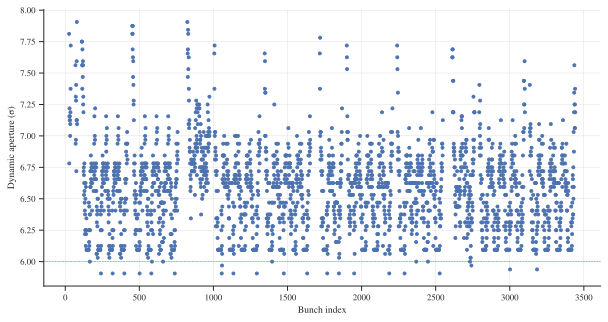

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(df["i_bunch_b1"], df["normalized amplitude in xy-plane"], s=10)
plt.xlabel("Bunch index")
plt.ylabel(r"Dynamic aperture ($\sigma$)")
plt.axhline(6, color='r', linestyle='--', label="Target")
plt.grid()
plt.savefig("plots/bbb_end_of_levelling.pdf")
plt.show()